Here you can find a code used to open and transform the files from Brats 2021. Hope I can help the ones trying to do the same in the future. I strugled a lot to do this when there's such a lack of tutorias and examples as such.

Hope I can help.

Any questions, you guys can ask.

# **Brats 2021**

Brats 2021 when you first decompress it in the first level you are going to face two different files one named 'BraTS2021_00495' and the other 'BraTS2021_00621'.

I'm going to solve them in two steps. They are basically the same and in the future you can also adapt this code for future uses when opening a .nii file.

# Opening 00495

First of all I'll import the libraries I used and then will clear your drive folder where your file is place.

**Warning:** Don't forget to change the path ways of your folder in the proper fields.

*Remember to mount your drive.* You can manually to this in the folder icon in your left and them click on the icon of the folder with a drive icon stamped on.

Pip install of the libraries

In [9]:
!pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 19.4 MB/s eta 0:00:00


Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import gzip
import nibabel as nib
import os
import shutil

Clearing your folder of messy folders due to interrupted excecut session

In [ ]:
if os.path.exists('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_flair'):
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_flair')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_t1')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_t1ce')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_t2')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_seg')

Unzip .tar -> .nii.gz

In [ ]:
import tarfile

tar_file_path = '/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/BraTS2021_00495.tar'

with tarfile.open(tar_file_path, 'r') as tar:
    # List the contents of the .tar file
    if not os.path.exists('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495'):
      os.makedirs('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495')
    tar.extractall(path='/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input')

Unzip .nii.gz -> .nii

In [ ]:
folder_path = '/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input'

for filename in os.listdir(folder_path):
    if filename.endswith('.nii.gz'):
        compressed_file_path = os.path.join(folder_path, filename)
        decompressed_file_path = os.path.join(folder_path, filename[:-3])
        with gzip.open(compressed_file_path, 'rb') as f_in:
            with open(decompressed_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

Now assign the variables with the .nii file

In [ ]:
flair = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input/BraTS2021_00495_flair.nii')
t1 = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input/BraTS2021_00495_t1.nii')
t1ce = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input/BraTS2021_00495_t1ce.nii')
t2 = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input/BraTS2021_00495_t2.nii')
seg = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_input/BraTS2021_00495_seg.nii')

Please check if the file is in the shape (240,240,155). If not you probably did one step wrong.

If (1,240,240,155) is your result please check if you did the .gz decompressure step.

Explanation (h,w,slice)

In [ ]:
t1.shape

(240, 240, 155)

The below is on of the instructions avaiable in https://neuraldatascience.io/8-mri/nifti.html you can see some of the data more extensively following it.

In [ ]:
t1.get_data_dtype() == np.dtype(np.int16)
t1.affine.shape
data = t1.get_fdata()
data.shape
hdr = t1.header
hdr.get_xyzt_units()
raw = hdr.structarr
raw['xyzt_units']

array(2, dtype=uint8)

In [ ]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

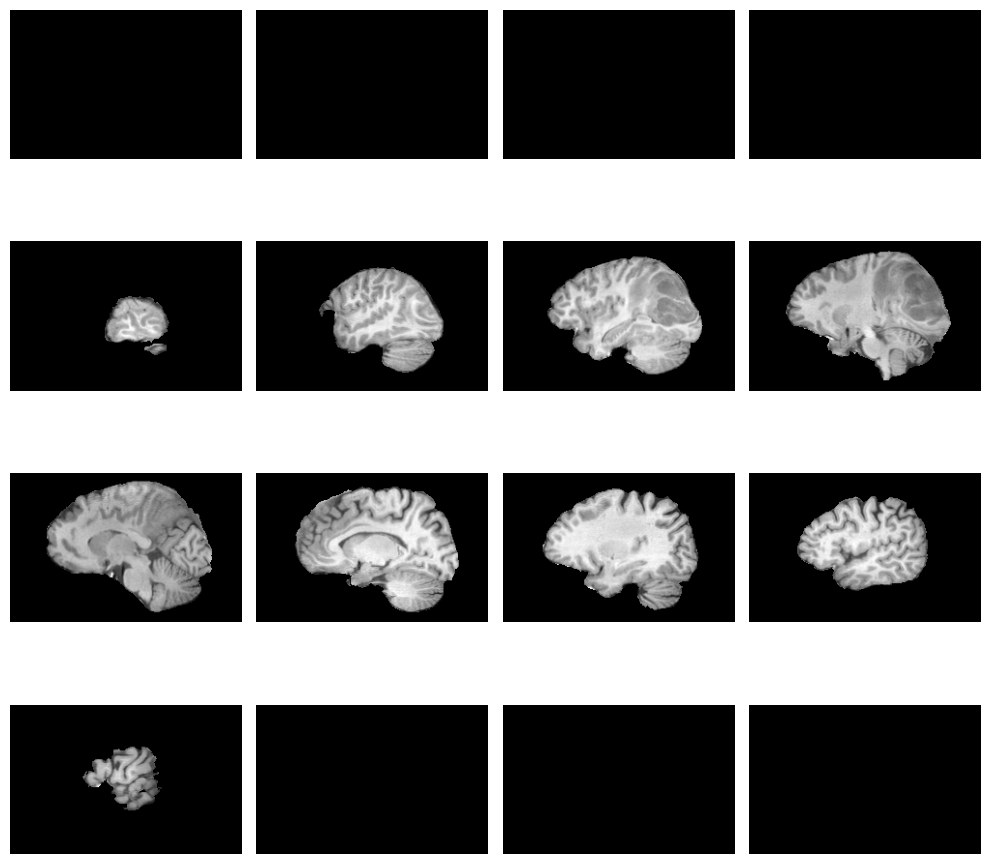

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

np_to_img def

The images will automatically appear on your drive folder *assigned*

In [ ]:
import os
import numpy as np
from PIL import Image
import shutil

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

num_colors = 256
color_values = list(range(num_colors))
gray_colormap = ListedColormap(['#{:02x}{:02x}{:02x}'.format(c, c, c) for c in color_values])



#os.makedirs('/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_flair')
os.makedirs('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_t1')
#os.makedirs('/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_t1ce')
#os.makedirs('/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_t2')
os.makedirs('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_seg')

def np_to_img(data):
  for i in range(data.shape[2]):
    data_slice=data.get_fdata()
    #if data is flair:
    #  output_dir='/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_flair'
    if data is t1:
      output_dir='/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_t1'
    #elif data is t1ce:
    #  output_dir='/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_t1ce'
    #elif data is t2:
    #  output_dir='/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_t2'
    elif data is seg:
      output_dir='/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00495_output/00495_seg'

    image = Image.fromarray(data_slice[i])
    image = image.convert('L')
    image_path = os.path.join(output_dir, f"slice_{i}.jpg")
    image.save(image_path)

np_to_img

In [ ]:
np_to_img(t1)
np_to_img(seg)

# Opening 00621

First of all I'll import the libraries I used and then will clear your drive folder where your file is place.

**Warning:** Don't forget to change the path ways of your folder in the proper fields.

*Remember to mount your drive.* You can manually to this in the folder icon in your left and them click on the icon of the folder with a drive icon stamped on.

Pip install of the libraries

Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import gzip
import nibabel as nib
import os
import shutil

Clearing your folder of messy folders due to interrupted excecut session

In [2]:
if os.path.exists('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_flair'):
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_flair')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_t1')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_t1ce')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_t2')
  shutil.rmtree('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_seg')

Unzip .tar -> .nii.gz

In [3]:
import tarfile

tar_file_path = '/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/BraTS2021_00621.tar'

with tarfile.open(tar_file_path, 'r') as tar:
    # List the contents of the .tar file
    if not os.path.exists('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621'):
      os.makedirs('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621')
    tar.extractall(path='/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input')

Unzip .nii.gz -> .nii

In [4]:
folder_path = '/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input'

for filename in os.listdir(folder_path):
    if filename.endswith('.nii.gz'):
        compressed_file_path = os.path.join(folder_path, filename)
        decompressed_file_path = os.path.join(folder_path, filename[:-3])
        with gzip.open(compressed_file_path, 'rb') as f_in:
            with open(decompressed_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

Now assign the variables with the .nii file

In [5]:
flair = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input/BraTS2021_00621_flair.nii')
t1 = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input/BraTS2021_00621_t1.nii')
t1ce = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input/BraTS2021_00621_t1ce.nii')
t2 = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input/BraTS2021_00621_t2.nii')
seg = nib.load('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_input/BraTS2021_00621_seg.nii')

Please check if the file is in the shape (240,240,155). If not you probably did one step wrong.

If (1,240,240,155) is your result please check if you did the .gz decompressure step.

Explanation (h,w,slice)

In [6]:
t1.shape

(240, 240, 155)

The below is on of the instructions avaiable in https://neuraldatascience.io/8-mri/nifti.html you can see some of the data more extensively following it.

In [7]:
t1.get_data_dtype() == np.dtype(np.int16)
t1.affine.shape
data = t1.get_fdata()
data.shape
hdr = t1.header
hdr.get_xyzt_units()
raw = hdr.structarr
raw['xyzt_units']

array(2, dtype=uint8)

In [10]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

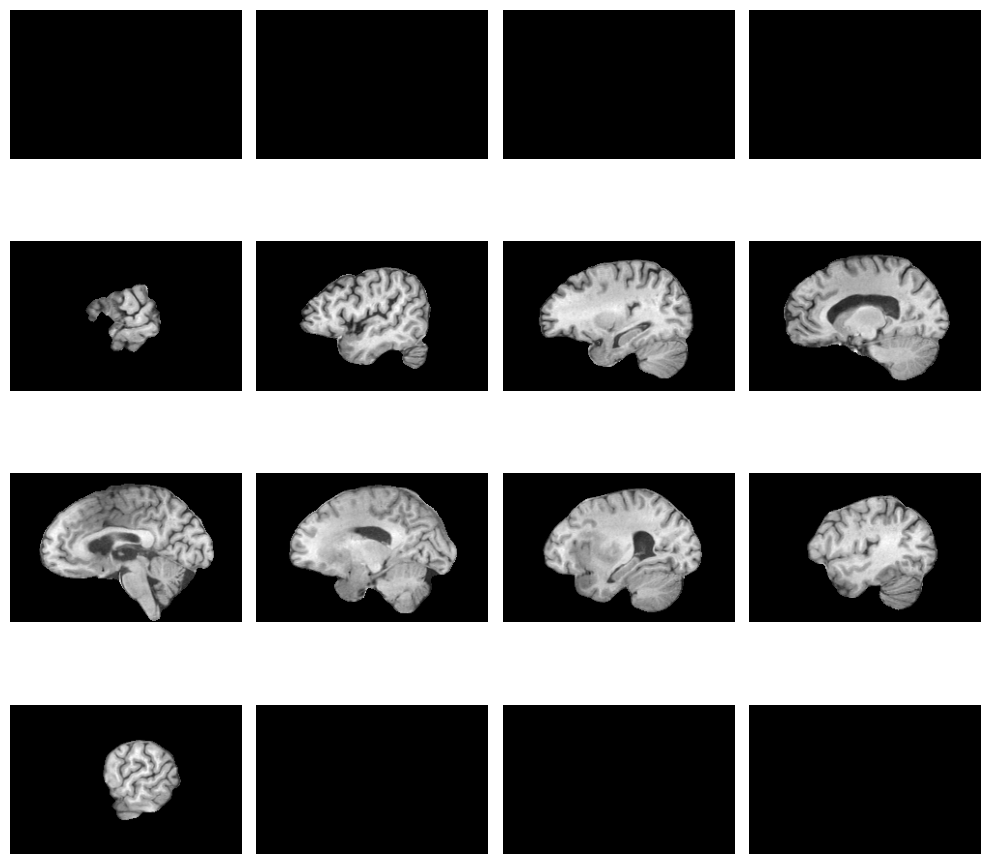

In [14]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

np_to_img def

The images will automatically appear on your drive folder *assigned*

In [12]:
import os
import numpy as np
from PIL import Image
import shutil

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

num_colors = 256
color_values = list(range(num_colors))
gray_colormap = ListedColormap(['#{:02x}{:02x}{:02x}'.format(c, c, c) for c in color_values])



#os.makedirs('/content/drive/MyDrive/IC/Brats/Brats2021/00621_output/00621_flair')
os.makedirs('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_t1')
#os.makedirs('/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_t1ce')
#os.makedirs('/content/drive/MyDrive/IC/Brats/Brats2021/00495_output/00495_t2')
os.makedirs('/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_seg')

def np_to_img(data):
  for i in range(data.shape[2]):
    data_slice=data.get_fdata()
    #if data is flair:
    #  output_dir='/content/drive/MyDrive/IC/Brats/Brats2021/00621_output/00621_flair'
    if data is t1:
      output_dir='/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_t1'
    #elif data is t1ce:
    #  output_dir='/content/drive/MyDrive/IC/Brats/Brats2021/00621_output/00621_t1ce'
    #elif data is t2:
    #  output_dir='/content/drive/MyDrive/IC/Brats/Brats2021/00621_output/00621_t2'
    elif data is seg:
      output_dir='/content/drive/MyDrive/IC/Datasets/Brats/Brats2021/00621_output/00621_seg'

    image = Image.fromarray(data_slice[i])
    image = image.convert('L')
    image_path = os.path.join(output_dir, f"slice_{i}.jpg")
    image.save(image_path)

np_to_img

In [13]:
np_to_img(t1)
np_to_img(seg)